In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import operator
from sklearn import datasets

In [0]:
iris = datasets.load_iris()

X = iris.data

df = X[:,[1,2]]

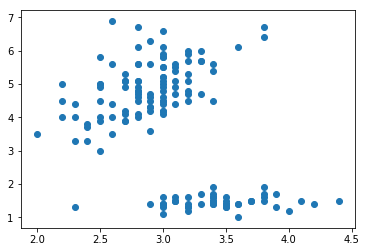

In [3]:
plt.scatter(df[:,0], df[:,1])
plt.show()

In [4]:
df.shape

(150, 2)

In [0]:
k = 4

m = df.shape[0]

centroids = [] 

for i in range(k):
    rand = np.random.randint(0,df.shape[0]-1)
    centroids.append(df[rand])

centroids = np.array(centroids)

In [6]:
centroids

array([[3.7, 1.5],
       [2.4, 3.8],
       [3.1, 5.4],
       [2.8, 4.6]])

In [0]:
clusters = []

for i in range(len(df)):
  clusters.append(np.random.randint(0, k-1))

In [0]:
def kmeans(df1, centroids1, clusters1, k1):
  for i in range(len(df1)):
    centroid_dist = {}
  
    for j in range(k):
      centroid_dist[j] = np.linalg.norm(df1[i] - centroids1[j])
    
    sorted_dist = sorted(centroid_dist.items(), key = operator.itemgetter(1))
  
    clusters1[i] = sorted_dist[0][0]

  
  for i in range(k1):
    count = 0
    group = []
    for j in range(len(df1)):
      if clusters1[j] == i:
        group.append(df1[i])
    group = np.array(group)
    centroids1[i] = np.mean(group, axis = 0)
    
    return centroids1, clusters1  

In [0]:
n_iter = 10000

for _ in range(n_iter):
  centroids, clusters = kmeans(df, centroids, clusters, k)

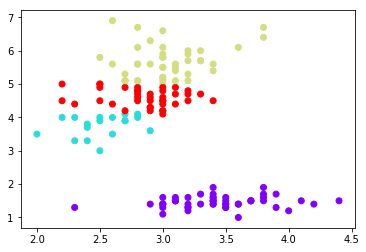

In [10]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, k))

plt.scatter(df[:,0], df[:,1], c = colors[clusters])
